<a href="https://colab.research.google.com/github/rafaelbsouza/Portfolio/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Rafael Souza](https://www.linkedin.com/in/rbssouza)*

---
 

# Analisando a Violência no Rio de Janeiro

![Rio](https://prefeitura.rio/wp-content/uploads/2019/12/pao-de-acucar.png)
A criminalidade no Brasil é uma das principais queixas feitas pelos brasileiros. Quem não nunca sonhou em sair de casa sem se preocupar com seus pertences, andar tranquilamente pela cidade sem nenhum peso na consciência ao usar o celular ou até mesmo não temer onde estacionar o carro?

A violência no Brasil está presente em todas as cidades e basta pararmos por alguns minutos em frente à TV para ficarmos revoltados e, ao mesmo tempo, com um sentimento de impotência, diante da realidade que muitos brasileiros enfrentam no dia a dia.

Atualmente, as leis de transparência de dados vêm desenvolvendo um bom papel no compartilhamento dessas informações, uma vez que, diversos dados são disponibilizados para a população, abertamente.

Como exemplo, pode-se destacar o **Governo do Estado do Rio de Janeiro** que, através do **Instituto de Segurança Pública**, disponibiliza o portal [ISPDados](http://www.ispdados.rj.gov.br), para consulta pública.

Neste projeto, analisaremos especificamente a criminalidade no **Estado do Rio de Janeiro**.



## Obtenção dos Dados

Os dados que analisaremos foram obtidos no ***portal ISPDados***,  [neste link](http://www.ispdados.rj.gov.br/estatistica.html).

As estatísticas divulgadas na página são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM).

Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

O portal conta, também, com um [dashboard interativo](http://www.ispvisualizacao.rj.gov.br/index.html) onde é possível conferir os dados sobre crimes por áreas de segurança pública.


### Importando os dados

Antes de iniciar a nossa análise inicial dos dados, iremos realizar a importação dos dados e dos pacotes que utilizaremos nesse projeto. 

In [12]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
#importando os dados que iremos trabalhar 
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')


## Análise Inicial dos Dados
Para essa análise inicial iremos: 
1.   Construir o dicionário dos dados
2.   Descobrir o tamanho do DataFrame
3.   Visualizar os 5 primeiros registros do nosso DataFrame
4.   Identificar a porcentagem de valores ausentes



###**Dicionário de Variáveis**

***Váriáveis de Identificação:*** 
* **ano**                          	-	Ano da comunicação da ocorrência
* **mes** 	-	Mês da comunicação da ocorrência
* **fase** - 	2 = Consolidado sem errata, 3 = Consolidado com errata
---
***Variáveis de títulos criminais***

*Grupo 1 - Vítimas de crimes violentos*
* **hom_doloso**                    	-	  Homicídio doloso		
* **lesao_corp_morte**              	-	  Lesão corporal seguida de morte		
* **latrocinio**                    	-	  Latrocínio (roubo seguido de morte)		
* **hom_por_interv_policial**       	-	Morte por intervenção de agente do Estado		
* **tentat_hom**                    	-	  Tentativa de homicídio
* **lesao_corp_dolosa**             	-	  Lesão corporal dolosa		
* **estupro**                       	-	Estupro
---
*Grupo 2 - Vítimas de crimes de trânsito*		
* **hom_culposo**                   	-	  Homicídio culposo (trânsito) - Atropelamento + colisão + outros		
* **lesao_corp_culposa**            	-	  Lesão corporal culposa (trânsito) - Atropelamento + colisão + outros
---	
*Grupo 3 - Roubos*

* **roubo_comercio**                	-	  Roubo a estabelecimento comercial		
* **roubo_residencia**              	-	  Roubo a residência		
* **roubo_veiculo**                 	-	  Roubo de veículo		
* **roubo_carga**                   	-	  Roubo de carga		
* **roubo_transeunte**              	-	  Roubo a transeunte (pessoas que se deslocam a pé)		
* **roubo_em_coletivo**             	-	  Roubo em coletivo (trânsporte público)		
* **oubo_banco**                   	-	  Roubo a banco		
* **roubo_cx_eletronico**           	-	  Roubo de caixa eletrônico		
* **roubo_celular**                 	-	  Roubo de telefone celular		
* **roubo_conducao_saque**          	-	  Roubo com condução da vítima para saque em instituição financeira		
* **roubo_apos_saque**              	-	Roubo após saque em instituição financeira		
* **roubo_bicicleta**               	-	Roubo de bicicleta		
* **outros_roubos**                 	-	Outros roubos que não os listados acima		
* **total_roubos**                  	-	Total de roubos
---
*Grupo 4 - Furtos*

* **furto_veiculos**                	-	  Furto de veículo		
* **furto_transeunte**              	-	Furto a transeunte (pessoas que se deslocam a pé)		
* **furto_coletivo**                	-	Furto em coletivo (trânsporte público)		
* **furto_celular**                 	-	Furto de telefone celular		
* **furto_bicicleta**               	-	Furto de bicicleta		
* **outros_furtos**                 	-	Outros furtos que não os listados acima		
* **total_furtos**                  	-	Total de furtos
---
*Grupo 5 - Outros registros de crime contra o patrimônio*		
* **sequestro**                     	-	  Extorsão mediante sequestro (sequestro clássico)		
* **extorsao**                      	-	  Extorsão 		
* **sequestro_relampago**           	-	  Extorsão com momentânea privação da liberdade (sequestro relâmpago)		
* **estelionato**                   	-	  Estelionato	
---
*Grupo 6 - Atividade Policial*	
* **apreensao_drogas**              	-	  Apreensão de drogas		
* **posse_drogas**                  	-	Número de registros que possuem algum título referente a posse de drogas		
* **trafico_drogas**                	-	Número de registros que possuem algum título referente a tráfico de drogas		
* **apreensao_drogas_sem_autor**    	-	Número de registros que possuem algum título referente a apreensão de drogas sem autor		
* **recuperacao_veiculos**          	-	  Recuperação de veículo		
* **apf**                           	-	Auto de Prisão em Flagrante		
* **aaapai**                        	-	Auto de Apreensão de Adolescente por Prática de Ato Infracional		
* **cmp**                           	-	Cumprimento de Mandado de Prisão		
* **cmba**                          	-	Cumprimento de Mandado de Busca e Apreensão
---
*Gropo 7 - Outros Registros*

* **ameaca**                        	-	  Ameaça 		
* **pessoas_desaparecidas**         	-	  Pessoas desaparecidas		
* **encontro_cadaver**              	-	  Encontro de cadáver		
* **encontro_ossada**               	-	  Encontro de ossada		
* **pol_militares_mortos_serv**     	-	  Policiais Militares mortos em serviço		
* **pol_civis_mortos_serv**        	-	  Policiais Civis mortos em serviço
---
*Grupo 8 - Indicadores Estratégicos*

* **indicador_letalidade**          	-	Indicadores Estratégicos: Crimes violentos letais intencionais		
* **indicador_roubo_rua**           	-	Indicadores Estratégicos: Roubo de rua		
* **indicador_roubo_veic**          	-	Indicadores Estratégicos: Roubo de veículo
---
*Grupo 9 - Registro de Ocorrências*	
* **registro_ocorrencias**         	-	  Registro de ocorrências (Total por mês)



### Tamanho do DataFrame

In [13]:
#ver o tamanho de linhas e colunas 
print("Entradas:\t{}".format(df.shape[0])) 
print("Colunas:\t{}".format(df.shape[1]))

#Verificar as 5 primeiras entradas do DataFrame
df.head()

Entradas:	344
Colunas:	56


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Valores Ausentes

Verificando as entradas acima, existem diversas colunas com valores NaN ou em branco. Isso indica que muitos registros estão nulos ou não foram preenchidos. 

Abaixo iremos explorar a porcentagem desses valores nulos/sem preenchimento

In [14]:
#Verificando a % de valores ausentes no DataFrame

(df.isnull().sum() / df.shape[0]  * 100).sort_values(ascending = False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


###Limpeza e ajuste do DataFrame

Como podemos ver acima, existem variáveis com até **80%** dos dados sem preenchimento. 

Com isso em mente, iremos:
* Realizar um filtro onde trabalharemos com os dados dos **últimos 5 anos.**
* Renomear a variável ***vano***
* Criar uma nova coluna ***data*** para trabalhar com dados estatísticos
* Transformar todos as variáveis do tipo ***float*** para ***Int***

In [15]:
# Renomeando a coluna vano para ano
df.rename(columns={'vano': 'ano'}, inplace=True);

# Criando a coluna data
df['data'] = df['mes'].astype(str) + '/' + df['ano'].astype(str);

# Convertendo a coluna data para datetime
df['data'] = pd.to_datetime(df['data'], format='%m/%Y', );

#Consulta para buscar apenas de 2014 em diante.
df.query('ano >=  2014');

# definindo nosso novo dataframe
df_limpo = df.query('ano >=  2014');

# alterando os tipos de veriáveis float para int
df_limpo = df_limpo.astype(
    {
    'lesao_corp_morte' : 'int', 'hom_por_interv_policial': 'int', 'estupro': 'int',
       'hom_culposo': 'int', 'lesao_corp_culposa': 'int','roubo_cx_eletronico' : 'int',
       'roubo_celular' : 'int', 'roubo_conducao_saque': 'int', 'roubo_apos_saque': 'int',
       'roubo_bicicleta': 'int', 'furto_coletivo': 'int', 'furto_celular': 'int',
       'furto_bicicleta': 'int', 'sequestro': 'int', 'extorsao': 'int', 'sequestro_relampago': 'int', 'estelionato': 'int',
       'posse_drogas': 'int', 'trafico_drogas': 'int', 'apreensao_drogas_sem_autor': 'int',
        'apf': 'int', 'aaapai': 'int', 'cmp': 'int', 'cmba': 'int', 'ameaca': 'int',
       'pessoas_desaparecidas': 'int', 'encontro_ossada': 'int',
       'pol_militares_mortos_serv': 'int', 'pol_civis_mortos_serv': 'int', 'registro_ocorrencias' : 'int'
    
    }
);

# Verificando a % de valores ausentes para o novo dataframe
(df_limpo.isnull().sum() / df_limpo.shape[0]  * 100).sort_values(ascending = False)

data                          0.0
furto_coletivo                0.0
furto_veiculos                0.0
total_roubos                  0.0
outros_roubos                 0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_celular                 0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_carga                   0.0
roubo_veiculo                 0.0
roubo_residencia              0.0
roubo_comercio                0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
hom_por_interv_policial       0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
mes                           0.0
furto_transeunte              0.0
furto_celular                 0.0
fase          

Após a aplicação do filtro e a contrução do novo DataFrame, é possível verificar que de 2014 em diante, todos os dados foram devidamente preenchidos.

Com isso em mente, baixo podemos verificar a quantidade de linhas e colunas, após a limpeza dos dados. 




In [16]:
#ver o tamanho de linhas e colunas 
print("Total de Entradas:\t{}".format(df_limpo.shape[0])) 
print("Total de Colunas:\t{}".format(df_limpo.shape[1]))
print ("")
print ("")
#Verificar os tipos de veriáveis em cada coluna
df_limpo.head()

Total de Entradas:	68
Total de Colunas:	57




,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,data
276,2014,1,464,3,15,50,557,9050,555,194,4064,774,126,3206,489,6625,662,6,4,473,9,121,0,1275,13770,1638,3268,938,1538,0,9880,17262,0,178,31,3017,2356,1160,1012,219,2342,3095,1091,1494,47,9034,628,66,3,0,0,532,7760,3206,75403,3,2014-01-01
277,2014,2,482,5,16,56,543,8093,555,166,3787,728,140,3025,418,6555,621,4,5,461,14,123,0,1167,13261,1484,3274,940,1349,0,8809,15856,0,154,18,2873,2126,904,1021,234,2167,3095,1114,1289,58,8049,520,63,3,1,0,559,7637,3025,69434,3,2014-02-01
278,2014,3,510,5,10,46,544,8357,479,214,3938,773,125,2947,401,7014,639,2,4,555,16,94,0,1141,13711,1640,4564,974,1577,0,9248,18003,1,175,17,2745,2046,871,1002,228,2355,3154,1077,1533,60,8154,563,59,2,5,0,571,8208,2947,72915,3,2014-03-01
279,2014,4,449,1,17,37,559,7484,469,194,3638,758,120,3073,371,6777,657,3,5,554,9,142,0,1239,13708,1498,2612,939,1124,0,8229,14402,0,129,14,2700,2161,885,1077,250,2426,3105,1001,1700,73,7440,532,41,3,1,0,504,7988,3073,67358,3,2014-04-01
280,2014,5,444,3,8,53,505,6249,442,161,3941,728,139,3073,520,7033,571,1,4,573,9,111,0,1168,13930,1510,2576,876,1153,0,8116,14231,0,163,17,2864,2086,900,975,251,2495,2884,817,1929,67,6689,451,32,3,2,0,508,8177,3073,66175,3,2014-05-01


## Informações Estatísticas da Violência no Rio de Janeiro
O Rio de Janeiro é a cidade brasileira mais visitada pelos turistas. É o sonho de muita gente conhecer o que há de melhor nesse estado e nessa cidade maravilhosa, que gera tanto encanto ao redor do mundo. Durante o ano inteiro, a cidade está repleta de turistas buscando passeios e diversão.

Contudo, a cidade do Rio de Janeiro é imensa, intensa e caótica. O que faz com que muitos turistas temam por sua segurança ao visitá-la. 

Nesta análise, iremos explorar as maiores preocupações de turistas visitando uma cidade

Como referência iremos utilizar as variáveis dos seguintes grupos: 
* Roubos
* Furtos 
* Crimes contra o patriônio.

### Roubo e Furtos

Uma das maiores preocupações dos turistas ao visitar o Rio de Janeiro é a segurança e, por este motivo, muitos têm medo de programar uma viagem com destino a Cidade Maravilhosa. 

A cidade é linda, ficamos apaixonados e consequentemente a primeira coisa que vem à nossa mente é eternizar aquele momento. Registrando, comumente, todas essas experiências com os nossos smartphones.




###Celulares

**Já se perguntou a quantidade de celulares que são roubados e furtados no Rio de Janeiro?** 

In [17]:
print('A partir dos dados levantados, nota-se que:')
print ("")
# Total de ocorrências de roubo e furto
total_rf = df_limpo.total_furtos.sum() + df_limpo.total_roubos.sum()
print ('O total de Furtos e Roubo é de: {}'.format(total_rf))

# Total de ocorrências de roubo e furto de celulares
total_cel_rf = df_limpo.roubo_celular.sum() + df_limpo.furto_celular.sum()
print ('O total de Furtos e Roubo de celular é de: {}'.format(total_cel_rf))

# porcentagem de celulares roubados e furtados sobre o número de ocorrências registradados no período. 
pct = total_cel_rf / total_rf * 100
print("A Taxa de celulares roubados é de: {}% ".format(round(pct),2))

A partir dos dados levantados, nota-se que:

O total de Furtos e Roubo é de: 2044302
O total de Furtos e Roubo de celular é de: 204656
A Taxa de celulares roubados é de: 10.0% 


Observando as informações acima, no período de janeiro de 2015 à Agosto de 2019, foram registrados mais de **2 Milhões** de ocorrências de Roubo e Furto. 

Desse total, **10%** representam apenas a quantidade de celulares roubados ou furtados.

Preocupante, não é mesmo? Sobretudo se você é um turista visitando o Rio, é melhor deixar seu celular bem guardado. 

Abaixo, podemos ver o gráfico onde é representado quantidade de roubos e furtos de celulares no período.

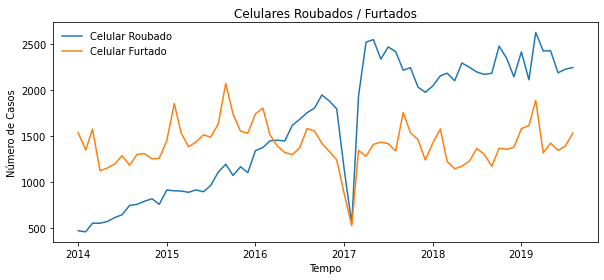

In [18]:
# Gráfico
fig, ax = plt.subplots(figsize=(8.5,4))
ax.plot(df_limpo['data'], df_limpo['roubo_celular'], label='Celular Roubado')
ax.plot(df_limpo['data'], df_limpo['furto_celular'], label='Celular Furtado')
plt.grid(False)
plt.title('Celulares Roubados / Furtados')
plt.ylabel('Número de Casos')
plt.xlabel('Tempo')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

No gráfico acima, nota-se claramente os picos de furto em épocas onde existe uma maior concentração de turistas no estado (Dezembro e Janeiro). 

É nítido, também, que apesar dos esforços das autoridades competentes quanto a segurança no Estado, o gráfico está em uma constante crescente. 

Quanto ao início do ano de 2017, observa-se uma queda brusca do número de roubos e furtos. Contudo, isso se deve ao fato da Polícia Civil estar em greve no período.



### Deslocamento

Uma das coisas mais maravilhosas do Rio é poder visitar muitos pontos turísticos caminhando ou utilizando algum transporte público... 

**...Mas será que é seguro?**

In [19]:
# Demostração estatística de roubo e furtos a pessoas que estão se locomovendo ( a pé ou transporte público)
df_limpo[{"roubo_transeunte", "roubo_em_coletivo", "furto_transeunte", "furto_coletivo"}].describe()

,furto_transeunte,roubo_transeunte,roubo_em_coletivo,furto_coletivo
count,68.000000,68.000000,68.000000,68.000000
mean,2309.250000,6909.529412,1042.926471,785.852941
std,806.095609,1219.036376,372.011768,151.108962
min,663.000000,2260.000000,487.000000,167.000000
25%,1619.750000,6414.500000,650.500000,698.250000
50%,2097.500000,7015.500000,1129.000000,782.500000
75%,2835.500000,7649.250000,1353.000000,896.500000
max,4975.000000,9669.000000,1628.000000,1023.000000


Nota-se que a abordagem no Rio é **muito agressiva**, visto que as maiores médias registrada, refere-se a Roubo (por meio de violência ou de grave ameaça). 

A média mensal de roubos às pessoas que estão andando pela cidade, nos últimos 5 anos, é de aproximadamente 7 mil casos por mês. Ao destacarmos furto, esse número é **33% menor**, ou seja, aproximadamente 2300 registros mensais. Ainda assim, estamos falando em uma média de quase 10 mil casos por mês. 

Esta análise apoia-se em casos onde se há o registro de ocorrência. Os números podem ser bem maiores, levando em consideração que nem todo furto é comunicado as autoridades.

**É assustador!**



###Saques

Atualmente, com toda a facilidade que a tecnologia nos proporciona, ainda é comum alguns estabelecimentos só aceitarem dinheiro em espécie. E, nem sempre temos a disposição aquele dinheiro conosco.

**Posso sacar tranquilamente meu dinhero nessas ocasiões, ou me dirijo a outro estabelecimento onde é aceito meios de pagamentos, modernos?** 


A média de roubos com condução da vítima para saque em instituição financeira é de: 7
A média de roubos após saque em instituição financeira é de: 87



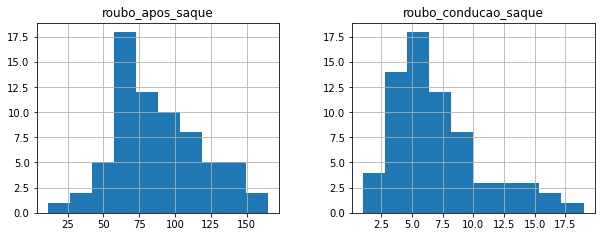

In [20]:
#Histograma roubo com condução / roubo após saque
df_limpo[{'roubo_conducao_saque', 'roubo_apos_saque'}].hist(figsize=(10,3.5));
#Médias de roubo com condução / roubo após saque
mean_conducao = df_limpo.roubo_conducao_saque.mean()
mean_apos = df_limpo.roubo_apos_saque.mean()
print ("A média de roubos com condução da vítima para saque em instituição financeira é de: {}".format(round(mean_conducao),2))
print ("A média de roubos após saque em instituição financeira é de: {}".format(round(mean_apos),2))
print("")

Nos gráfico acima, nota-se claramente que é mais comum os roubos ocorrerem, após o saque, com uma média mensal de 87 registros, contra 7 com a condução da vítima.

Apensar dos números serem baixos, recomenda-se muita atenção ao realizar esse tipo de operação em lugares desconhecidos.

###Trânsito

Quem nunca olhou pra uma pessoa na sua cidade e pensou: "Esse cara não é daqui!". Todo mundo uma vez ou outro já teve esse pensamento, observando simplesmente, a atitude dessas pessoas em seu entorno.

É comum turistas destraídos sofrerem algum tipo de lesão ou até mesmo morrer em determinadas circunstâncias, no trânsito.

Abaixo, analisaremos:


*   **hom_culposo** - Homicídio culposo (trânsito) - Atropelamento + colisão + outros
*   **lesao_corp_culposa** -Lesão corporal culposa (trânsito) - Atropelamento + colisão + outros



A média de Homicídio culposo (trânsito) - Atropelamento + colisão + outros é de: 161 vítimas.
A média de Lesão corporal culposa (trânsito) - Atropelamento + colisão + outros é de: 2862 vítimas.


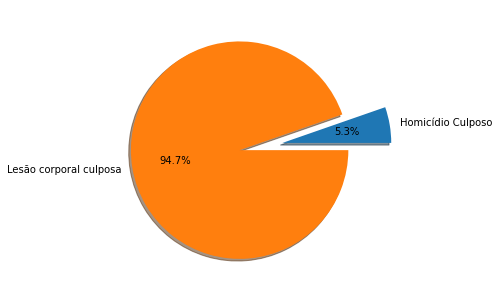

In [21]:
#calcular a média das variáveis hom_culposo e lesao_corp_culposa
mediah_culposo = df_limpo.hom_culposo.mean()
mediah_culposo = (round(mediah_culposo))
medial_culposo = df_limpo.lesao_corp_culposa.mean()
medial_culposo = (round(medial_culposo))

#apresentando as informações na tela
print('A média de Homicídio culposo (trânsito) - Atropelamento + colisão + outros é de: {}'.format(mediah_culposo), 'vítimas.')
print ('A média de Lesão corporal culposa (trânsito) - Atropelamento + colisão + outros é de: {}'.format(medial_culposo),'vítimas.')

#criando gráfico de setores
rotulos = ['Homicídio Culposo', 'Lesão corporal culposa']
valores = [mediah_culposo, medial_culposo]
explode = (0,0.4)

plt.figure(figsize=(5,5))
plt.pie(x=valores, labels=rotulos, explode=explode , autopct='%1.1f%%', shadow=True)

plt.show()



Em média, por mês, são mais de 3 mil vítimas em decorrência de acidentes de trânsito. Desse total, aproximadamente 95% são lesões corparais sem vítimas. 

Contudo, é nota-se que embora o percentual de vítimas fatais seja baixo, em média, 161 pessoas morrem somente em virtude de acidentes de trânsito, o que torna o número bem relevante. 

 

In [53]:
#média populacional do estado do rio dos ultimos 5 anos 16862000
#Calcular a Taxa por 100k habitantes

print("Em 2018 a Taxa de Homicídios por 100 mil habitantes no Rio foi de: {} mortes."
.format(round(df_limpo[df_limpo['ano']==2018].hom_culposo.sum() / 17150000 * 100000)))
print("Em 2018 a Taxa de Lesões Corporais por 100 mil habitantes no Rio foi de: {} vítimas."
.format(round(df_limpo[df_limpo['ano']==2018].lesao_corp_culposa.sum() / 17150000 * 100000)))
print("Em 2019 a Taxa de Homicídios por 100 mil habitantes no Rio foi de: {} mortes."
.format(round(df_limpo[df_limpo['ano']==2019].hom_culposo.sum() / 17264943 * 100000)))
print("Em 2019 a Taxa de Lesões Corporais por 100 mil habitantes no Rio foi de: {} vítimas."
.format(round(df_limpo[df_limpo['ano']==2019].lesao_corp_culposa.sum() / 17264943 * 100000)))



Em 2018 a Taxa de Homicídios por 100 mil habitantes no Rio foi de: 11.0 mortes.
Em 2018 a Taxa de Lesões Corporais por 100 mil habitantes no Rio foi de: 160.0 vítimas.
Em 2019 a Taxa de Homicídios por 100 mil habitantes no Rio foi de: 7.0 mortes.
Em 2019 a Taxa de Lesões Corporais por 100 mil habitantes no Rio foi de: 106.0 vítimas.


Acima, comparando o ano de 2018 e 2019, nota-se uma queda de aproximadamente **60%** no número de mortes e vítimas, respetivamente por 100 mil habitantes.

De todo modo, muita atenção ao atravesar a rua!

###Veículos

No Brasil, não é novidade pra ninguém, a precáriedade do sistem público de transporte. Por este motivo, muitos brasileiros optam por realizar suas atividades de carro. 

Contudo, como a segurança no país ainda é um grande problema, não é incomum ouvirmos relatos de pessoas que perderam seus veículos, para as mãos de criminosos. 

No gráfico abaixo, é demonstrado um comparativo entre os veículos roubados, furtados e recuperados.


O total de veículos roubados/furtado no período estudado foi de: 333557
Foram recuperados aproximadamente 51.0 % dos veículos perdidos, no período 



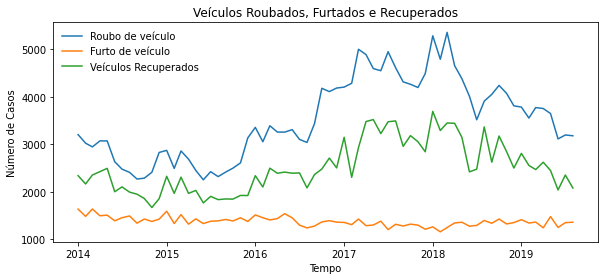

In [74]:
# calculando os valores das médias e taxa de recuperação
total_r = df_limpo.roubo_veiculo.sum()
total_f = df_limpo.furto_veiculos.sum()
recuperados = df_limpo.recuperacao_veiculos.sum()
total_rf = total_r + total_f
media_recuperados = recuperados/total_rf * 100

print("")
print("O total de veículos roubados/furtado no período estudado foi de: {}".format(total_rf))
print ("Foram recuperados aproximadamente {} % dos veículos perdidos, no período ".format(round(media_recuperados)))
print("")

# plotando o Gráfico
fig, ax = plt.subplots(figsize=(8.5,4))
ax.plot(df_limpo['data'], df_limpo['roubo_veiculo'], label='Roubo de veículo')
ax.plot(df_limpo['data'], df_limpo['furto_veiculos'], label='Furto de veículo')
ax.plot(df_limpo['data'], df_limpo['recuperacao_veiculos'], label='Veículos Recuperados')
plt.grid(False)
plt.title('Veículos Roubados, Furtados e Recuperados')
plt.ylabel('Número de Casos')
plt.xlabel('Tempo')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

Embora o número total de veículos roubados e furtados nos últimos 5 anos, assuste. A taxa de recuperação de veículos passa dos **50%**. 

Como esperado e observado em outros áreas, no estado do Rio a abordagem tende a ser violenta, onde o **roubo é predominante**.


## Conclusão

A situação no Rio é tão assustadora quando em outros estados do Brasil. Contudo, comparando ano a ano, a violência vem diminuindo gradativamente, o que é exepcional, mas, longe de estar figurando entre os estados mais seguros no Brasil. 

Mesmo com todos os problemas, os turistas não deixam de visitar o Rio, que é a cidade mais visitada no Brasil. 

Mas, **atenção!** Os dados são reais e representam a fragilidade na segurança pública do estado.
